#Lecture 12

* assign 2 
* group project

##Algebraic computing
There are many packages out that can do algebraic computing. Examples include Mathematica and Maple. In order to stay within the python ecosystem we have become used to we are going to use [SymPy](<http://www.sympy.org>). You can find a [SymPy Tutorial](<http://docs.sympy.org/0.7.3/tutorial/index.html>) and for a quick trial you may use [SymPy Live](<http://live.sympy.org>). I have in the past had the experience that Mathematica could a very demanding simplifiaction that SymPy could not. However, that was a while ago, and things are evolving. Clearly SymPy is mature enough to learn about the basic idea of algebraic computing. 

### Homework
As the function of wavelength, Planck's law is
$$
B_\lambda (T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{hc/\lambda kT} - 1}.
$$

Wien's displacement law states that there is an inverse relationship between the wavelength of the peak of 
the emission of a black body and its temperature,
$$
\lambda_\mathrm{max} = \frac{b}{T},
$$
where $\lambda_\mathrm{max}$ is the peak wavelength, $T$ is the absolute temperature of the black body, 
and $b$ is a constant of proportionality called Wien's displacement constant.
Using Planck's law calculate this constant using SymPy Live.

Help is provided in [this document, section 1.2](<http://csa.phys.uvic.ca/teaching/solve-problems-with-sympy/examples-of-problems-to-solve-with-sympy-live/view>).


### Installation
In your *phast* machine you need to search and install the 

### A simple ploting example
As an introduction we want to explore how to define and plot a simple sympy function and how we can interveave analytical and numerical work, in my opinion a real strength of the python environment.



In [36]:
import sympy as sp
x, y, z, t = sp.symbols('x y z t')
f, g, h = sp.symbols('f g h', cls=sp.Function)

In [39]:
# define an expression                                                          
f=sp.exp(-x)*x**2/(1-sp.log(x))
sp.pprint(f)

    2  -x  
   x ⋅ℯ    
───────────
-log(x) + 1


In [38]:
#look at integral of f                                                          
sp.pprint(sp.Integral(f))

⌠               
⎮     2  -x     
⎮    x ⋅ℯ       
⎮ ─────────── dx
⎮ -log(x) + 1   
⌡               


In [40]:
#plot it                                                                        
sp.plotting.plot(f, (x,0.5,1))

In [41]:
#evaluate it                                                                    
f.subs(x,0.7)

0.179355268515064

In [42]:
# In order to work with the function f numerically                              
# create a python function, e.g. a lambda function                              
ff=lambda x: x**2*exp(-x)/(-log(x) + 1)
# evaluate                                                                      
ff(0.7)

0.179355268515064

In [43]:
# instead of copy and paste we can create a python lambda function              
# directly from the sympy function                                              
lam_f=sp.utilities.lambdify(x,f)
# and evaluate                                                                  
lam_f(0.7)

0.1793552685150639

In [45]:
# another way to do a python function, for longer things                                    
def fff(xx):
    return f.subs(x,xx)
fff(0.7)

0.179355268515064

In [52]:
# evaluate for a vector and randomize to pretend this                           
# is a measurement (the vectorize method is provided by                         
# the numpy package which is automatically loaded directly                      
# into the interactive name space in an ipython --pylab session                 
import numpy as np
xx = np.linspace(0.5,1,18)
yy = np.vectorize(fff)(xx)

In [51]:
# or                                                                                        
#yy = np.vectorize(lam_f)(xx)
#r  = 0.1
#yy = yy * (1. + r*(2.*np.random(len(yy))-1))

TypeError: 'module' object is not callable

Populating the interactive namespace from numpy and matplotlib


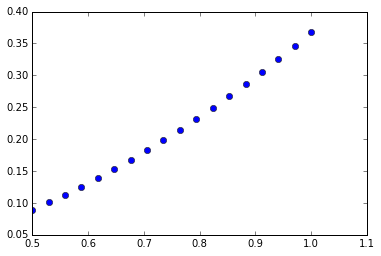

In [55]:
%pylab inline
plot(xx,yy,'o')

In [56]:
from sympy import *
r, s = symbols('r s', cls=sp.Function)
r = exp(x*y*z)
diff(r,x)
pprint(diff(r,x))

     x⋅y⋅z
y⋅z⋅ℯ     


In [58]:
# series expansion: f(x).series(x, x0, n)
s=(1/(1-y))
s.series(y,0,2)

1 + y + O(y**2)

In [ ]:
(1/(1-y)).series

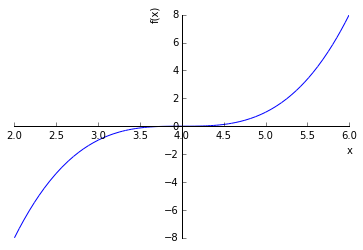

In [59]:
# finding the root (again!)
s = (x-4)**3
plotting.plot(s,(x,2,6))

In [60]:
solve(s,x)

[4]

In [61]:
s = (x-4)**3 + exp(x)

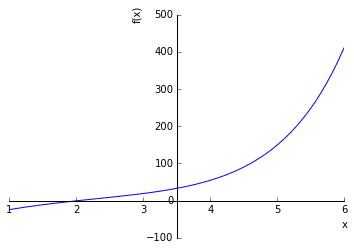

In [62]:
plotting.plot(s,(x,1,6))

In [35]:
nsolve(s,x,2.2)

mpf('2.0316249951568118')

## Units

Physics is about numbers with units. We have seen the power of the priniciple of dimensional homogeneity when we derived an expression for the drag coefficient. We can draw units into our python work using - of coruse - appropriate packages. One of them can be found in the `astropy` package. You will be able to install it using the usual procedure in your phast machine. Have a look at these places for documentation:

* [Units and Quantities](http://docs.astropy.org/en/latest/units/index.html)
* [Quantity](http://docs.astropy.org/en/latest/units/quantity.html)

Here is an example:
* calculate how long a $50\mathrm{W}$ light bulb could shine with the energy that is consumed by destruction when a car going at $120\mathrm{km/h}$ hits a rigid wall.
* before solving this problem make a guess! you may be surprised

In [18]:
import astropy.units as u
m = 1300 * u.kg
v = 120 *u.km/u.hr
E = 0.5*m*v**2
P = 50 * u.watt

In [16]:
print E.to('erg')
print E
print E.si
u.erg.find_equivalent_units()

7.22222222222e+12 erg
9360000.0 kg km2 / h2
722222.222222 m N


  Primary name | Unit definition        | Aliases     
[
  J            | kg m2 / s2             | Joule, joule ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg      ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt ,
  erg          | 1e-07 kg m2 / s2       |              ,
]

In [25]:
t = E / P
print t.si
print t.to('hr')

14444.4444444 s
4.01234567901 h


### Homework
You have a gravity-feed power generator  that can transform the potential energy of water stored
in a tank on the top of the roof of your house into electric energy.
Calculate how much water you would have pump up to your roof at $22.5\mathrm{m}$ height if you want to 
run your computer (your laptop used $30\mathrm{W}$) each night for 2 hours. 


#Multi-physics simulations with COMSOL
Unfortunately we will not have time to work with this in detail in this course. However, may want to have look at the [CSA teaching pages](http://csa.phys.uvic.ca/teaching/multi-physics-projects-with-comsol). COMSOL is a multi-physics solver package that can solve many types of problems that are too complicated to solve analytically. You all have access to the software. From you phast VM log into the astroserv computer via `ssh -Y`. Then start `comsol` on the command line. Here we will only go over some examples of what can be done to wet your appetite. 